<a href="https://colab.research.google.com/github/anvitendulkar10/Projects/blob/master/Airline%20Price%20Prediction/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
!pip install Scikit-learn


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC,SVR
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from datetime import datetime, timedelta




In [143]:
df = pd.read_excel('/content/drive/MyDrive/Github Project/Project/Airline Fare  Prediction/Data_Train_clean.xlsx')

In [144]:
pd.set_option('display.max_columns', None)

In [145]:
df.shape

(10682, 11)

In [146]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [148]:
df.shape

(10682, 11)

In [149]:
df.dropna(inplace = True)

In [150]:
df.shape

(10682, 11)

In [151]:
df[['Airline','Source','Destination']] = df[['Airline','Source','Destination']].astype('category')

In [152]:
memory_in_bytes = df.memory_usage().sum()
memory_in_mb = memory_in_bytes / (1024 ** 2)
memory_in_mb


0.6834506988525391

##  split the data

In [153]:
X = df.drop('Price' , axis=1)
y = df['Price']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [155]:
print(X_train.shape, X_test.shape)

(7477, 10) (3205, 10)


In [156]:
X_train_df = X_train.copy()

In [157]:
X_train_df.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info


In [158]:
# X_train['Total_Stops'].replace({'non-stop' : '0 stop'}, inplace=True)

In [159]:
# X_train.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','arrival_date'], inplace=True)

In [160]:
# X_train.drop(columns=['Additional_Info'], inplace=True)

In [161]:
X_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info
2373,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 28 May,10h 30m,1 stop,No info


In [162]:
# ohe =OneHotEncoder(drop ='first', sparse=False)
# encoded_features = ohe.fit_transform(X_train[['Airline', 'Source', 'Destination']])

# # Create a DataFrame with the encoded features
# encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Airline', 'Source', 'Destination']))
# encoded_df.head(3)

In [163]:
# le =LabelEncoder()
# X_train[['Airline', 'Source', 'Destination']]= le.fit_transform(X_train[['Airline', 'Source', 'Destination']])
# # encoded_df = pd.DataFrame(encoded_features, columns=le.get_feature_names_out(['Airline', 'Source', 'Destination']))
# X_train.head(3)

In [164]:
# le =LabelEncoder()
# X_train['Airline']= le.fit_transform(X_train['Airline'])
# X_train['Source']= le.fit_transform(X_train['Source'])
# X_train['Destination']= le.fit_transform(X_train['Destination'])
# X_train.head(3)

In [165]:
# X_train_df['Duration']
# non_string_mask = ~X_train_df['Duration'].apply(lambda x: isinstance(x, str))

# # Extract non-string values
# non_string_values = X_train_df[non_string_mask]
# non_string_values

In [166]:
# def extract_duration(X):
#     def extract(row):
#         pattern = r'(?:(\d+)h)?\s?(?:(\d+)m)?'
#         matchobj = re.match(pattern, row)
#         hr = int(matchobj.group(1)) if matchobj.group(1) else 0
#         min = int(matchobj.group(2)) if matchobj.group(2) else 0
#         return pd.Series({'hours': hr, 'minutes': min})

#     # Apply the function to each row
#     return X.apply(extract)

In [167]:
def arrival_date_extract(X):
  def extract(df):
    pattern = r'(?:(\d+)h)?\s?(?:(\d+)m)?'
    matchobj = re.match(pattern, df['Duration'])
    # print(df['Dep_Time'])
    # print(matchobj)
    hr = int(matchobj.group(1)) if matchobj.group(1) else 0
    min = int(matchobj.group(2)) if matchobj.group(2) else 0
    journey_dt = df['Date_of_Journey']+' '+ df['Dep_Time']
    dt_time = datetime.strptime(journey_dt, "%d/%m/%Y %H:%M")
    # arrival_date = dt_time + timedelta(hours=df['duration_hr'], minutes=df['duration_min'])
    arrival_date = dt_time + timedelta(hours=hr, minutes=min)
    day = arrival_date.day
    month = arrival_date.month
    hour = arrival_date.hour
    minute = arrival_date.minute
    return pd.Series([hr,min,day, month, hour, minute], index=['duration_hr','duration_min','arrival_day', 'arrival_month', 'arrival_hour', 'arrival_minute'])
  return X.apply(extract, axis=1)


def Date_of_Journey_split(X):
  def extract(df):
    jorney=  pd.to_datetime(df)
    month= jorney.month
    day = jorney.day
    return pd.Series({'journey_month': month, 'journey_day': day})
  return X.apply(extract)


def departure_time_split(X1):
  def extract(temp):
    hour = temp.split(':')[0]
    minute = temp.split(':')[1]
    return pd.Series([hour,minute] ,index=['dep_hour', 'dep_min'])
  return X1.apply(extract)

def total_stop(X):
  def extract(row):
    row = row.replace('non-stop', '0 stop')
    pattern = r'(\d)\s?\w+'
    matchobj = re.match(pattern, row)
    if matchobj is not None:
      return pd.Series([int(matchobj.group(1))],index=['Total_Stops'])
  return X.apply(extract)


In [168]:
preprocessor =ColumnTransformer([
    ('arrival_date_extract', FunctionTransformer(arrival_date_extract,validate=False), ['Date_of_Journey','Dep_Time','Duration']),
    ('Date_of_Journey_split', FunctionTransformer(Date_of_Journey_split,validate=False), 'Date_of_Journey'),
    ('departure_time_split', FunctionTransformer(departure_time_split,validate=False), 'Dep_Time'),
    ('total_stop', FunctionTransformer(total_stop,validate=False), 'Total_Stops'),
  ], remainder='passthrough', verbose_feature_names_out=False,)
clf = Pipeline([
    ('preprocessor',preprocessor),
    # ('scalar',StandardScaler())
])
# transformed_data = clf.fit_transform(X_train,y_train)


In [169]:
# transformed_data.drop(columns=['Route','Arrival_Time','Additional_Info'], inplace=True)

In [170]:
X_train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
749,Jet Airways,27/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info
6077,SpiceJet,21/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info


In [171]:
# print(transformed_data['Airline'].nunique())
# print(transformed_data['Source'].nunique())
# print(transformed_data['Destination'].nunique())


In [172]:
# transformed_data1 = transformed_data.copy()

In [179]:
encoder =ColumnTransformer([
    ('one-hot', OneHotEncoder(drop='first', sparse_output=False, dtype='int16' ,handle_unknown = 'ignore'), ['Source', 'Destination','Airline']),
    # ('drop', FunctionTransformer(lambda df: df.drop(['Route', 'Arrival_Time', 'Additional_Info'], axis=1), validate=False), None)
     ('column_dropper', 'drop', ['Route', 'Arrival_Time', 'Additional_Info']),

], remainder='passthrough', verbose_feature_names_out=False)


en_clf = Pipeline([
    ('clf',clf),

    ('encoder',encoder),
    ('scalar',StandardScaler())
])
encode_data = en_clf.fit_transform(X_train,y_train)

In [180]:
encode_data.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,duration_hr,duration_min,arrival_day,arrival_month,arrival_hour,arrival_minute,journey_month,journey_day,dep_hour,dep_min,Total_Stops
749,-0.195407,-0.856268,-0.605938,3.865544,-0.856268,-0.367814,3.865544,-0.195407,-0.31399,-0.440702,-0.138637,-0.496361,1.334774,-0.025868,-0.353846,-0.040094,-0.281502,-0.011566,-0.21522,-0.011566,-1.087739,0.095983,1.528880,1.105936,-0.333513,1.529017,0.154151,1.612463,-0.422870,-0.249285,-1.224892
6077,-0.195407,-0.856268,1.650335,-0.258696,-0.856268,-0.367814,-0.258696,-0.195407,-0.31399,-0.440702,-0.138637,-0.496361,-0.749190,-0.025868,-0.353846,-0.040094,3.552367,-0.011566,-0.21522,-0.011566,-0.969978,0.095983,0.821351,1.105936,0.830464,0.923885,0.154151,0.931388,0.792872,-0.783661,-1.224892
2373,-0.195407,1.167859,-0.605938,-0.258696,1.167859,-0.367814,-0.258696,-0.195407,-0.31399,-0.440702,-0.138637,-0.496361,-0.749190,-0.025868,2.826089,-0.040094,-0.281502,-0.011566,-0.21522,-0.011566,-0.027893,0.095983,1.646802,0.247702,-1.788484,0.318753,-0.181586,1.612463,0.445517,-1.318037,0.256589
2442,-0.195407,-0.856268,1.650335,-0.258696,-0.856268,-0.367814,-0.258696,-0.195407,-0.31399,-0.440702,-0.138637,-0.496361,-0.749190,-0.025868,-0.353846,-0.040094,-0.281502,-0.011566,-0.21522,-0.011566,0.207629,-1.662279,-0.475787,0.247702,-0.479010,0.923885,1.161363,-0.884811,1.661259,0.819467,0.256589
5402,-0.195407,1.167859,-0.605938,-0.258696,1.167859,-0.367814,-0.258696,-0.195407,-0.31399,2.269107,-0.138637,-0.496361,-0.749190,-0.025868,-0.353846,-0.040094,-0.281502,-0.011566,-0.21522,-0.011566,1.502996,0.095983,-0.475787,1.105936,0.830464,-0.588946,1.161363,-0.771299,1.140227,1.086655,1.738071


In [182]:
encode_data.shape

(7477, 31)

<Axes: >

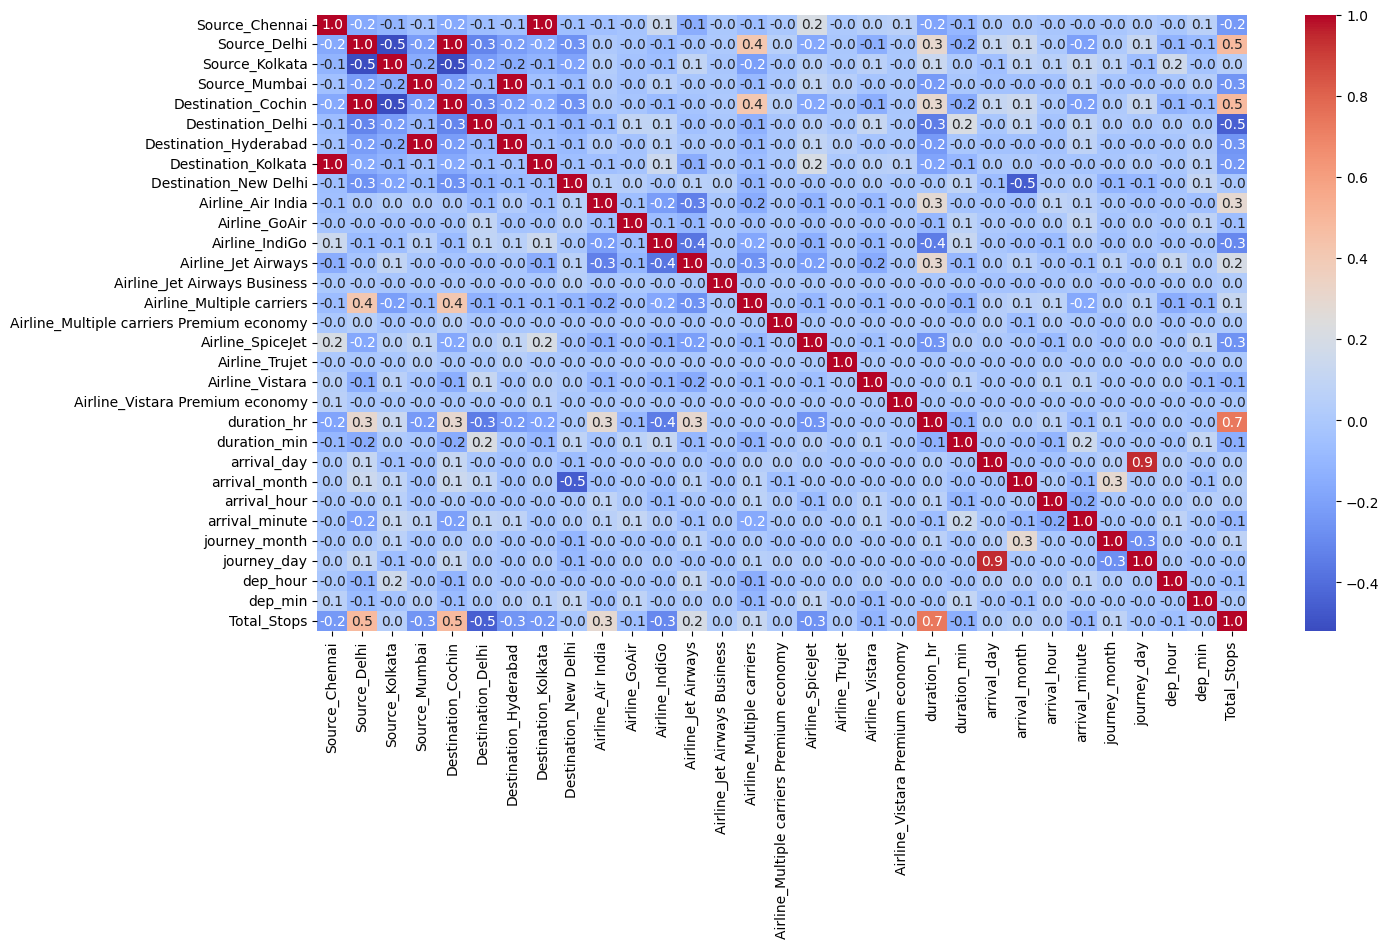

In [183]:
# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(encode_data.corr(), annot=True, fmt=".1f", cmap='coolwarm')

# model bilding

In [184]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    # 'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [185]:
encode_data.columns.to_list()

['Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'duration_hr',
 'duration_min',
 'arrival_day',
 'arrival_month',
 'arrival_hour',
 'arrival_minute',
 'journey_month',
 'journey_day',
 'dep_hour',
 'dep_min',
 'Total_Stops']

In [186]:
X_test['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,1666
non-stop,1066
2 stops,463
3 stops,10


In [187]:
# X_test1  = clf.transform(X_test)
# print(X_test1)
# X_test_encode =  en_clf.transform(X_test1)

      duration_hr  duration_min  arrival_day  arrival_month  arrival_hour  \
6075           10            25           22              5             1   
3544            9             0            3              6            19   
9290           12            45           10              5             9   
5032            2            20           24              5            17   
2483            5            35           22              5             4   
...           ...           ...          ...            ...           ...   
7917            8            25            2              6             4   
5858            7             5            9              6            23   
2689            3            15           12              5            17   
4486            1            20            9              5            22   
7877           13            55            9              5            22   

      arrival_minute  journey_month  journey_day dep_hour dep_min  \
6075  

KeyError: "None of [Index(['Date_of_Journey', 'Dep_Time', 'Duration'], dtype='object')] are in the [columns]"

In [ ]:
def scorer(model_name, model, X_train, X_test):
    cols = encode_data.columns.to_list()
    output = []

    output.append(model_name)

    # df = X_train[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time', 'Duration', 'Total_Stops']]

    # X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(en_clf,df, y_train , cv=kfold, scoring='r2')
    output.append(scores.mean())
    pipe_clf.fit(df,y_train)

    y_pred = pipe_clf.predict(X_test_encode)

    output.append(mean_absolute_error(y_test,y_pred))

    return output


In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model,X_train,X_test))
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])
model_df